<a href="https://colab.research.google.com/github/Baldezo313/Some-real-world-machine-learning-project/blob/main/PROJET_2_PREDICTION_DU_PRIX_D%E2%80%99UNE_MAISON_EN_FONCTION_DE_SES_CARACTERISTIQUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 2 : PREDICTION DU PRIX D’UNE MAISON EN FONCTION DE SES CARACTERISTIQUES  

Le marché de l’immobilier est l’un des secteurs économiques les plus importants au monde.
Chaque année, ce sont des centaines de milliards de dollars de transactions immobilières qui
sont effectuées. Les investisseurs les plus avertis, utilisent les outils de Data Science et de
Machine Learning pour analyser les données et en tirer des informations importantes. Ces
informations leur permettent de prendre de meilleures décisions par rapport à leurs
investissements.  

Dans ce projet, nous traiterons d’un cas d’application de l’apprentissage automatique supervisé
à l’industrie immobilière. Il s’agira de construire un modèle de régression linéaire capable de
prédire le prix d’une maison en fonction de certains de ses attributs.

* **Librairie**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

* **Donnée**  
L'ensemble de données que nous utiliserons contient des informations sur un ensemble de maison dans la région de Boston.  

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/Boston.csv?token=GHSAT0AAAAAAC4VKTER5MZZV5Y7NT2IGUJSZ4GEC2Q')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


La dataframe contient 506 lignes (chaque ligne représente une maison) et 13 variables. Pour comprendre la signification de chaque variable, veuillez-vous reporter à la page descriptive 10
de ces données. La variable MEDV est notre variable d’intérêt. Elle indique la valeur médiane
des logements occupés par leur propriétaire en 1000 $.  

Apparemment, il n’y a pas de valeurs manquantes dans la dataframe.  

Nous pouvons aussi vérifier s’il y a des lignes complètes dupliquées et les supprimer.

In [4]:
# Nombre de lignes entières dupliquées
df.duplicated().sum()

0

Il n’y a pas de lignes entières dupliquées.

## ANALYSE EXPLORATOIRE  

* **RESUME STATISTIQUE DES DONNEES**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


* **CORRELATIONS ENTRE VARIABLES**

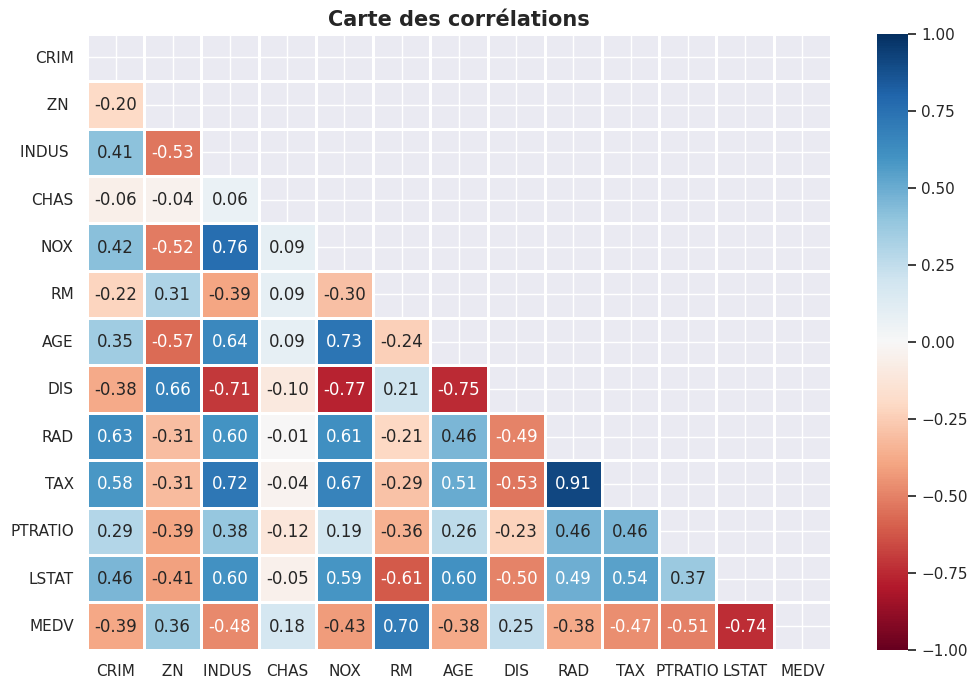

In [6]:
# Carte des corrélations

sns.set(rc={'figure.figsize':(12,8)})
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations', fontsize=15, fontweight="bold")
plt.show()

Cette carte nous indique la force des relations linéaires entre les variables indépendantes d’une
part et entre chacune de ces variables avec la variable cible. Plus le carré est rouge, plus la
corrélation entre les deux variables est forte et négative. Plus le carré est bleu, plus la corrélation
entre les deux variables est forte et positive. Par exemple, il y a une forte corrélation positive
entre la variable cible (MEDV) et la variable RM qui indique le nombre moyen de pièces par
logement. Autrement dit plus la maison a de pièces, plus son prix est élevé (ce qui est tout à fait
logique).

* **DISTRIBUTION DES VARIABLES**  

Nous pouvons visualiser d’un seul coup la distribution de chaque variable :

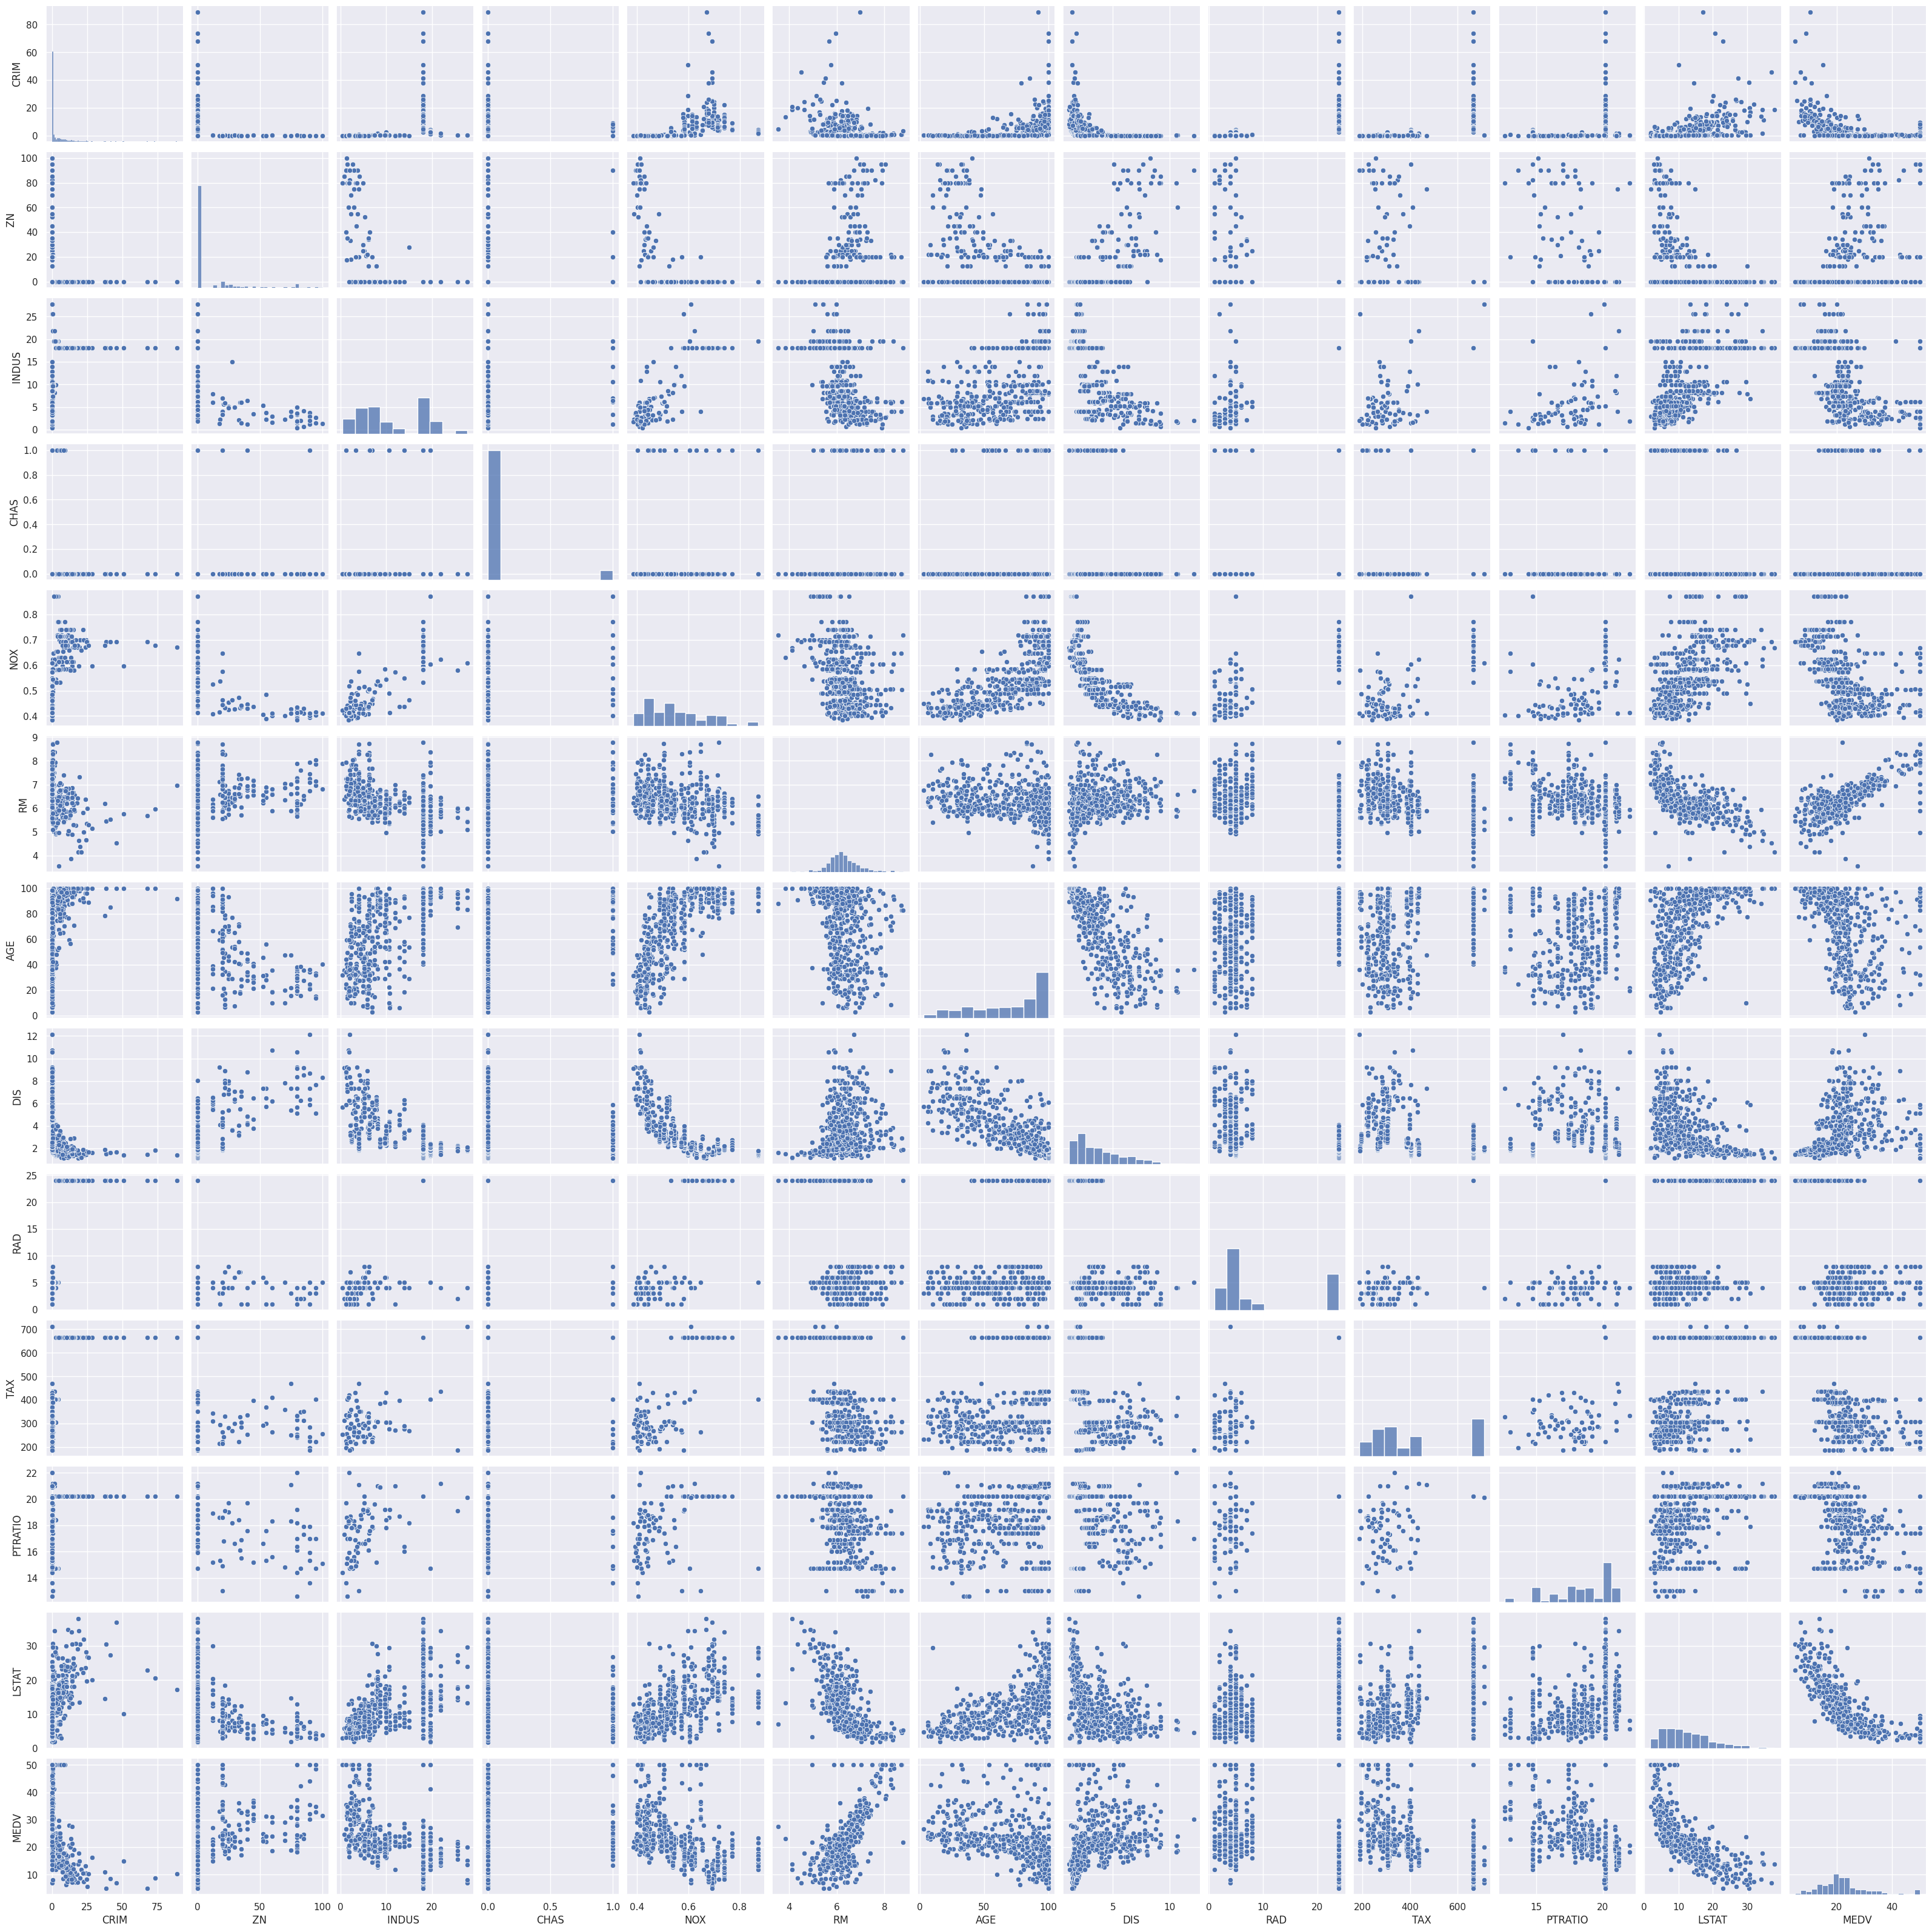

In [7]:
sns.pairplot(df)

La fonction pairplot() 11 trace des relations par paires dans un jeu de données. Par défaut, cette
fonction crée une grille d'axes de telle sorte que chaque variable numérique dans les données
sera partagée dans l'axe des y sur une seule ligne et dans l'axe des x sur une seule colonne. Les
56
axes diagonaux sont traités différemment, dessinant un tracé pour montrer la distribution
univariée des données pour la variable dans cette colonne.

Nous pouvons aussi tracer séparément chaque histogramme. Traçons par exemple la
distribution de la variable d’intérêt :

<ipython-input-8-7c2e58fd47f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'])


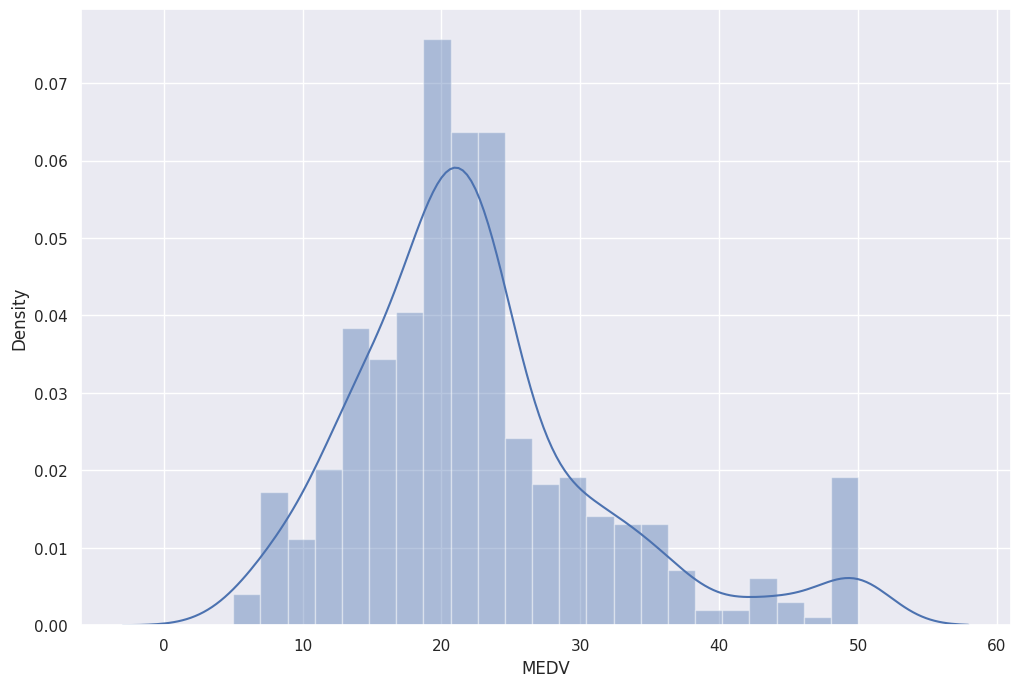

In [8]:
# Histogramme de la variable cible
sns.distplot(df['MEDV'])
plt.show()

Selon ce graphique, la distribution de la variable cible suit quasiment une loi normale.  

Pourquoi s'intéresse-t-on si tant aux distributions des variables ?  
La plupart des algorithmes de Machine Learning sont conçus selon l'hypothèse que les variables
d'entrées suivent une loi normale. Si ce n'est pas le cas, cela peut affecter énormément la qualité
du modèle et conduire à de mauvaises prédictions. Il existe plusieurs techniques de
transformations de variables pour normaliser les variables (la transformation logarithmique par
exemple). Afin d'être plus confiant sur la distribution de chaque variable par rapport à la loi normale, nous allons calculer les degrés d'asymétrie. Une distribution normale a un degré d'asymétrie égal à 0. Donc une variable suit la loi normale lorsque son degré d'asymétrie est proche de 0.

In [9]:
# Calcul des degrés d'asymétrie
df.skew().sort_values()

,0
PTRATIO,-0.802325
AGE,-0.598963
INDUS,0.295022
RM,0.403612
TAX,0.669956
NOX,0.729308
LSTAT,0.906460
RAD,1.004815
DIS,1.011781
MEDV,1.108098


D’après ces résultats, les variables ayant les plus forts degrés d’asymétrie sont : ZN (proportion de terrains résidentiels zonés pour les lots de plus de 25 000 sq.ft.), CHAS (Variable fictive de Charles River égale à 1 si la zone délimite la rivière et 0 sinon) et CRIM (taux de criminalité par habitant par ville).

In [10]:
# Transformation logarithmique des variables 'CRIM', 'RAD', 'DIS', 'MEDV', 'CHAS' et ' ZN '

df['CRIM'] = np.log(df['CRIM'])
df['RAD'] = np.log(df['RAD'])
df['DIS'] = np.log(df['DIS'])
df['MEDV'] = np.log(df['MEDV'])
df['CHAS'] = np.log(df['CHAS'] + 1)
df[' ZN '] = np.log(df[' ZN '] + 1)

# (Re)calcul des coefficients d'asymétrie
df.skew().sort_values()

,0
PTRATIO,-0.802325
AGE,-0.598963
MEDV,-0.330321
DIS,0.152730
RAD,0.286617
INDUS,0.295022
RM,0.403612
CRIM,0.405934
TAX,0.669956
NOX,0.729308


Supprimons la variable 'CHAS' à cause de son coefficient d'asymétrie trop élevé par rapport à
celui des autres variables :

In [11]:
df.drop('CHAS', axis = 1, inplace = True)

Traçons une nouvelle carte des corrélations afin de voir si les relations linéaires ont été renforcées ou pas après les transformations logarithmiques de certaines variables :

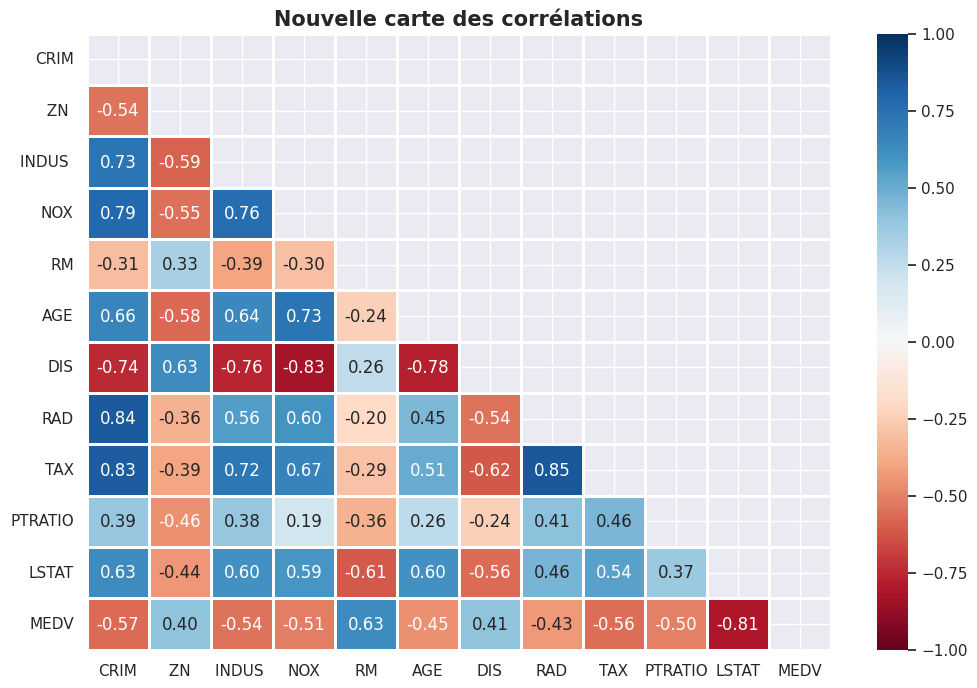

In [12]:
# Nouvelle carte des corrélations
sns.set(rc={'figure.figsize':(12,8)})
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Nouvelle carte des corrélations', fontsize=15, fontweight="bold")
plt.show()

En comparant cette nouvelle carte des corrélations à l’ancienne, nous remarquons effectivement
un renforcement de la relation linéaire entre plusieurs variables. Par exemple, la relation linéaire
entre la variable ‘CRIM’ et la variable cible s’est nettement améliorée (-0,39 à -0,57).

## MODELISATION  

Avant de passer à la construction du modèle, divisons d’abord la dataframe en données qui
serviront à entraîner le modèle (train data) et en données d’évaluation de la performance du
modèle (test data). Ainsi, nous pourrons mesurer la capacité de notre modèle à s’ajuster à de
nouvelles données. Cette division se fait avec la fonction train_test_split().

In [13]:
# Dataframe des variables indépendantes
X = df.drop('MEDV', axis = 1)

# Variable cible
y = df['MEDV']

Pour obtenir la dataframe des variables indépendantes, nous avons juste supprimer la variable
cible de df.

In [14]:
# Train/Test data
seed = 111
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

# Affichage des dimensions
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

X_train : (404, 11)
y_train : (404,)
X_test : (102, 11)
y_test : (102,)


Lorsqu’on divise les données, la grande partie est utilisée comme données d’entraînement et le
reste comme données d’évaluation. Ici, nous avons choisi une taille de données de test égale à
20% du total des observations. Le paramètre random_state permet d’obtenir une division
reproductible à chaque fois que nous exécutons ce code.

* **Passons à présent à la construction du modèle.**

In [15]:
# Création du modèle
model = LinearRegression()

# Entraînement de l'algorithme
model.fit(X_train, y_train)

LinearRegression()

Nous avons d’abord défini un modèle de régression linéaire (variable model) puis nous l’avons
ajusté aux données d’entraînement. La méthode d'ajustement fit() de l'objet modèle a été
appelée pour ajuster le modèle de régression linéaire aux données. L'ajustement consiste à estimer les coefficients de régression (paramètres) en utilisant la méthode  [des moindres carrés](https://en.wikipedia.org/wiki/Least_squares)
ordinaires.  

Une fois que le modèle est ajusté aux données, nous pouvons calculer certains paramètres
comme le coefficient de détermination (R²), l’erreur quadratique moyenne (MSE) et afficher
les coefficients ainsi que l’ordonnée à l’origine.

In [16]:
# Coefficient de détermination
model.score(X_train, y_train)

0.7599308321478286

Le coefficient de détermination est égal à 0,76.

In [17]:
# Coefficients du modèle
model.coef_

array([-2.18106829e-02,  4.64002574e-03,  3.95126878e-03, -7.40455507e-01,
        9.53280432e-02, -2.66628883e-04, -2.17151131e-01,  1.06946408e-01,
       -6.75755191e-04, -3.44875212e-02, -3.29385637e-02])

Connaissant ces coefficients, nous pouvons écrire une équation de la variable cible égale à une
combinaison linéaire des prédicteurs.  

Avant de calculer l’erreur quadratique moyenne, nous devons générer les prédictions c’est-àdire
les valeurs de la variable MEDV calculées par notre modèle.

In [18]:
# Prédictions sur le train data
y_pred = model.predict(X_train)

# Erreur quadratique moyenne
mean_squared_error(y_train, y_pred)

0.03970543844863188

L’erreur quadratique moyenne est égale à 0,04  

Afin de voir si notre modèle est capable de bien s’ajuster à de nouvelles données, calculons le
coefficient de détermination et l’erreur quadratique moyenne cette fois-ci sur les données de
test.

In [19]:
# R² sur le test data
model.score(X_test, y_test)

0.7335793246239519

Le R² des données de test (0,73) est inférieur à celui des données d’entraînement (0,76).

In [20]:
# Prédictions sur le test data
y_hat = model.predict(X_test)

# Erreur quadratique moyenne
mean_squared_error(y_test, y_hat)

0.045688397228595704

L’erreur quadratique moyenne du modèle sur les données de test est égale à environ 0,04
comme celui des données de test. Nous pouvons donc conclure qu’il n’y a pas un problème de
surajustement et que notre modèle est capable de bien se généraliser.

* **VALIDATION CROISEE DU MODELE**  

En divisant nos données, nous avons pu calculer certaines métriques sur les données de test afin
de nous assurer que le modèle est capable de bien s’ajuster à de nouvelles données. Mais, il y a
un écueil dans ce processus. Les données de test peuvent avoir certaines particularités qui font
que le R² (ou l’erreur quadratique moyenne) ait donné telle ou telle autre valeur. Donc la
métrique calculée n’est pas bien représentative de la capacité du modèle à généraliser sur de
nouvelles données. Pour pallier à ce problème dû essentiellement à la division arbitraire de la
fonction train_test_split(), nous utiliserons la technique de la validation croisée (
[crossvalidation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))).
14

Pour comprendre la technique de cross-validation :  
➢ Commençons par diviser la dataframe en 5 groupes ou plis ;  
➢ Ensuite, le premier pli est pris comme ensemble de test et l’algorithme est entraîné avec les 4 plis restants. On fait les prédictions sur l’ensemble de test puis on calcule la métrique d’évaluation du modèle ;  
➢ Le deuxième pli est maintenant utilisé comme ensemble de test et les 4 autres plis comme données d’entraînement ;  
➢ On fait de même jusqu’à ce que chacun des 5 plis ait été utilisé comme ensemble de test.  

Finalement, on se retrouve avec 5 modèles donc 5 métriques (R² par exemple) et on peut
calculer des statistiques comme la moyenne ou la médiane de ces métriques. Au lieu de 5 plis,
vous pouvez choisir k plis (k-fold cross validation) avec k un nombre entier naturel non null.
Mais attention au nombre de plis car plus vous avez de plis, plus cela est coûteux en termes de
calcul. La méthode de validation croisée nous permet d’éviter que la métrique d’évaluation
choisie ne dépende du fractionnement arbitraire de la fonction train_test_split().
Appliquons la technique de validation croisée avec 5 plis.

In [21]:
# Création d'un modèle
linear_model = LinearRegression()
# 5-fold cross-validation
cv_scores = cross_val_score(linear_model, X, y, cv = 5)
cv_scores

array([0.63039073, 0.7542449 , 0.59337479, 0.4822631 , 0.45586857])

Par défaut, cross_val_score() utilise R² comme métrique de choix pour la régression. Donc
nous avons 5 R² et nous pouvons calculer la moyenne et la médiane.

In [22]:
np.mean(cv_scores)

0.5832284181249286

In [23]:
np.median(cv_scores)

0.593374792571977

Le R² médian est égal à 0,59. Bien que cette valeur soit plus faible que les 0,73 obtenu en faisant
un simple train_test_split(), elle est beaucoup plus véridique. Nous pouvons valider le modèle
et être plus confiant sur sa qualité.

In [24]:
# Modèle final
lm = LinearRegression()
lm.fit(X, y)

# Coefficients
lm.coef_

array([-2.43563529e-02,  7.31048069e-04,  3.06055544e-03, -7.79681053e-01,
        9.64873383e-02,  1.89928201e-04, -2.12488554e-01,  1.02839484e-01,
       -6.27712028e-04, -3.70149683e-02, -3.29179525e-02])

In [25]:
# Ordonnée à l'origine
lm.intercept_

4.210068806396685

Nous pouvons écrire l’équation du modèle qui servira pour le calcul de la valeur d’une nouvelle maison dont on connaitra les caractéristiques :  
$𝑴𝑬𝑫𝑽 = −𝟐. 𝟒𝟑𝟓𝟔𝟑𝟓𝟐𝟗𝒆 − 𝟎𝟐 × 𝑪𝑹𝑰𝑴 + 𝟕. 𝟑𝟏𝟎𝟒𝟖𝟎𝟔𝟗𝒆 − 𝟎𝟒 × 𝒁𝑵
+ 𝟑. 𝟎𝟔𝟎𝟓𝟓𝟓𝟒𝟒𝒆 − 𝟎𝟑 × 𝑰𝑵𝑫𝑼𝑺 − 𝟕. 𝟕𝟗𝟔𝟖𝟏𝟎𝟓𝟑𝒆 − 𝟎𝟏 × 𝑵𝑶𝑺
+ 𝟗. 𝟔𝟒𝟖𝟕𝟑𝟑𝟖𝟑𝒆 − 𝟎𝟐 × 𝑹𝑴 + 𝟏. 𝟖𝟗𝟗𝟐𝟖𝟐𝟎𝟏𝒆 − 𝟎𝟒 × 𝑨𝑮𝑬
− 𝟐. 𝟏𝟐𝟒𝟖𝟖𝟓𝟓𝟒𝒆 − 𝟎𝟏 × 𝑫𝑰𝑺 + 𝟏. 𝟎𝟐𝟖𝟑𝟗𝟒𝟖𝟒𝒆 − 𝟎𝟏 × 𝑹𝑨𝑫
− 𝟔. 𝟐𝟕𝟕𝟏𝟐𝟎𝟐𝟖𝒆 − 𝟎𝟒 × 𝑻𝑨𝑿 − 𝟑. 𝟕𝟎𝟏𝟒𝟗𝟔𝟖𝟑𝒆 − 𝟎𝟐 × 𝑷𝑻𝑹𝑨𝑻𝑰𝑶
− 𝟑. 𝟐𝟗𝟏𝟕𝟗𝟓𝟐𝟓𝒆 − 𝟎𝟐 × 𝑳𝑺𝑻𝑨𝑻$  

Attention aux transformations logarithmiques. Pour prédire la valeur d’une nouvelle maison, il
faudra nécessairement effectuer les mêmes transformations logarithmiques. Le MEDV de
l’équation ci-dessus est une valeur log. Pour avoir la vraie valeur, il faut appliquer la fonction
numpy.exp().  

## CONCLUSION
La régression linéaire est très utilisée dans les problèmes de Machine Learning. Dans ce projet,
nous avons vu comment construire et évaluer un modèle de régression linéaire dans Python.  

Les deux premiers projets de ce livre nous ont permis d’être plongé dans la pratique du Machine
Learning. De façon précise, nous avons vu comment traiter un problème de régression. Le flux
de travail sera pratiquement le même pour des problèmes de classification.  

Dans le prochain projet, nous traiterons un problème de classification.